In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!nvidia-smi

Fri Aug  8 11:52:45 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 555.99                 Driver Version: 555.99         CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1650 Ti   WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   49C    P0             14W /   50W |       0MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
import os
HOME = os.getcwd()
print(HOME)

d:\Drowsiness Detection\Driver-Drowsines-Detection-FYP-main\Driver-Drowsines-Detection-FYP-main


In [4]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196  Python-3.11.9 torch-2.7.1+cu118 CUDA:0 (NVIDIA GeForce GTX 1650 Ti, 4096MiB)
Setup complete  (12 CPUs, 15.8 GB RAM, 11.2/293.0 GB disk)


In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

In [7]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="CSSrZ2rp40dMdCdLorPl")
project = rf.workspace("rdd-lkcpo").project("drowsiness-detection-va7er")
version = project.version(1)
dataset = version.download("yolov8")
                


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Drowsiness-Detection-1 in yolov8::   3%|▎         | 200/6898 [00:00<00:02, 2938.67it/s]


FileNotFoundError: [Errno 2] No such file or directory: 'Drowsiness-Detection-1\\train\\images\\602edff72af06859a9cf846a_driver-behavior-professional-truck-driver-driving-truck-vehicle-1000_jpg.rf.6f6f4d4341e7ed455391e827f478a6c7.jpg'

In [ ]:
%cd {HOME}
!pip install ray[tune]==2.0.0  # or another version compatible with your setup

/kaggle/working
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 MB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 86.5 MB/s eta 0:00:00
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.62.2
    Uninstalling grpcio-1.62.2:
      Successfully uninstalled grpcio-1.62.2
  Attempting uninstall: click
    Found existing installation: click 8.1.7
    Uninstalling click-8.1.7:
      Successfully uninstalled click-8.1.7
  Attempting uninstall: ray
    Found existing installation: ray 2.24.0
    Uninstalling ray-2.24.0:
      Successfully uninstalled ray-2.24.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.46.0 requires cloudpickle~=2.2.1, but you have cloudpickle 3.0.0 which is incompatible.
apache-beam 2.46.0 requires

In [8]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=10 imgsz=640 plots=True batch=8 device=0


  0%|          | 0.00/49.7M [00:00<?, ?B/s]
  1%|          | 256k/49.7M [00:00<00:22, 2.33MB/s]
  1%|▏         | 640k/49.7M [00:00<00:20, 2.47MB/s]
  2%|▏         | 1.12M/49.7M [00:00<00:17, 2.90MB/s]
  3%|▎         | 1.50M/49.7M [00:00<00:16, 3.12MB/s]
  4%|▍         | 1.88M/49.7M [00:00<00:17, 2.93MB/s]
  5%|▍         | 2.25M/49.7M [00:00<00:16, 3.04MB/s]
  5%|▌         | 2.62M/49.7M [00:00<00:15, 3.26MB/s]
  6%|▌         | 3.00M/49.7M [00:01<00:14, 3.34MB/s]
  7%|▋         | 3.38M/49.7M [00:01<00:16, 2.92MB/s]
  8%|▊         | 3.75M/49.7M [00:01<00:17, 2.75MB/s]
  8%|▊         | 4.12M/49.7M [00:01<00:18, 2.62MB/s]
  9%|▉         | 4.50M/49.7M [00:01<00:18, 2.58MB/s]
 10%|▉         | 4.88M/49.7M [00:01<00:18, 2.57MB/s]
 10%|█         | 5.12M/49.7M [00:01<00:18, 2.58MB/s]
 11%|█         | 5.50M/49.7M [00:02<00:17, 2.63MB/s]
 12%|█▏        | 5.88M/49.7M [00:02<00:17, 2.67MB/s]
 13%|█▎        | 6.25M/49.7M [00:02<00:16, 2.73MB/s]
 13%|█▎        | 6.62M/49.7M [00:02<00:16, 2.81MB/s]
 14

In [11]:
!ls {HOME}/runs/detect/train

F1_curve.png					   train_batch1.jpg
PR_curve.png					   train_batch1470.jpg
P_curve.png					   train_batch1471.jpg
R_curve.png					   train_batch1472.jpg
args.yaml					   train_batch2.jpg
confusion_matrix.png				   val_batch0_labels.jpg
confusion_matrix_normalized.png			   val_batch0_pred.jpg
events.out.tfevents.1747671799.22df42d0c1b9.107.0  val_batch1_labels.jpg
labels.jpg					   val_batch1_pred.jpg
labels_correlogram.jpg				   val_batch2_labels.jpg
results.csv					   val_batch2_pred.jpg
results.png					   weights
train_batch0.jpg


/kaggle/working


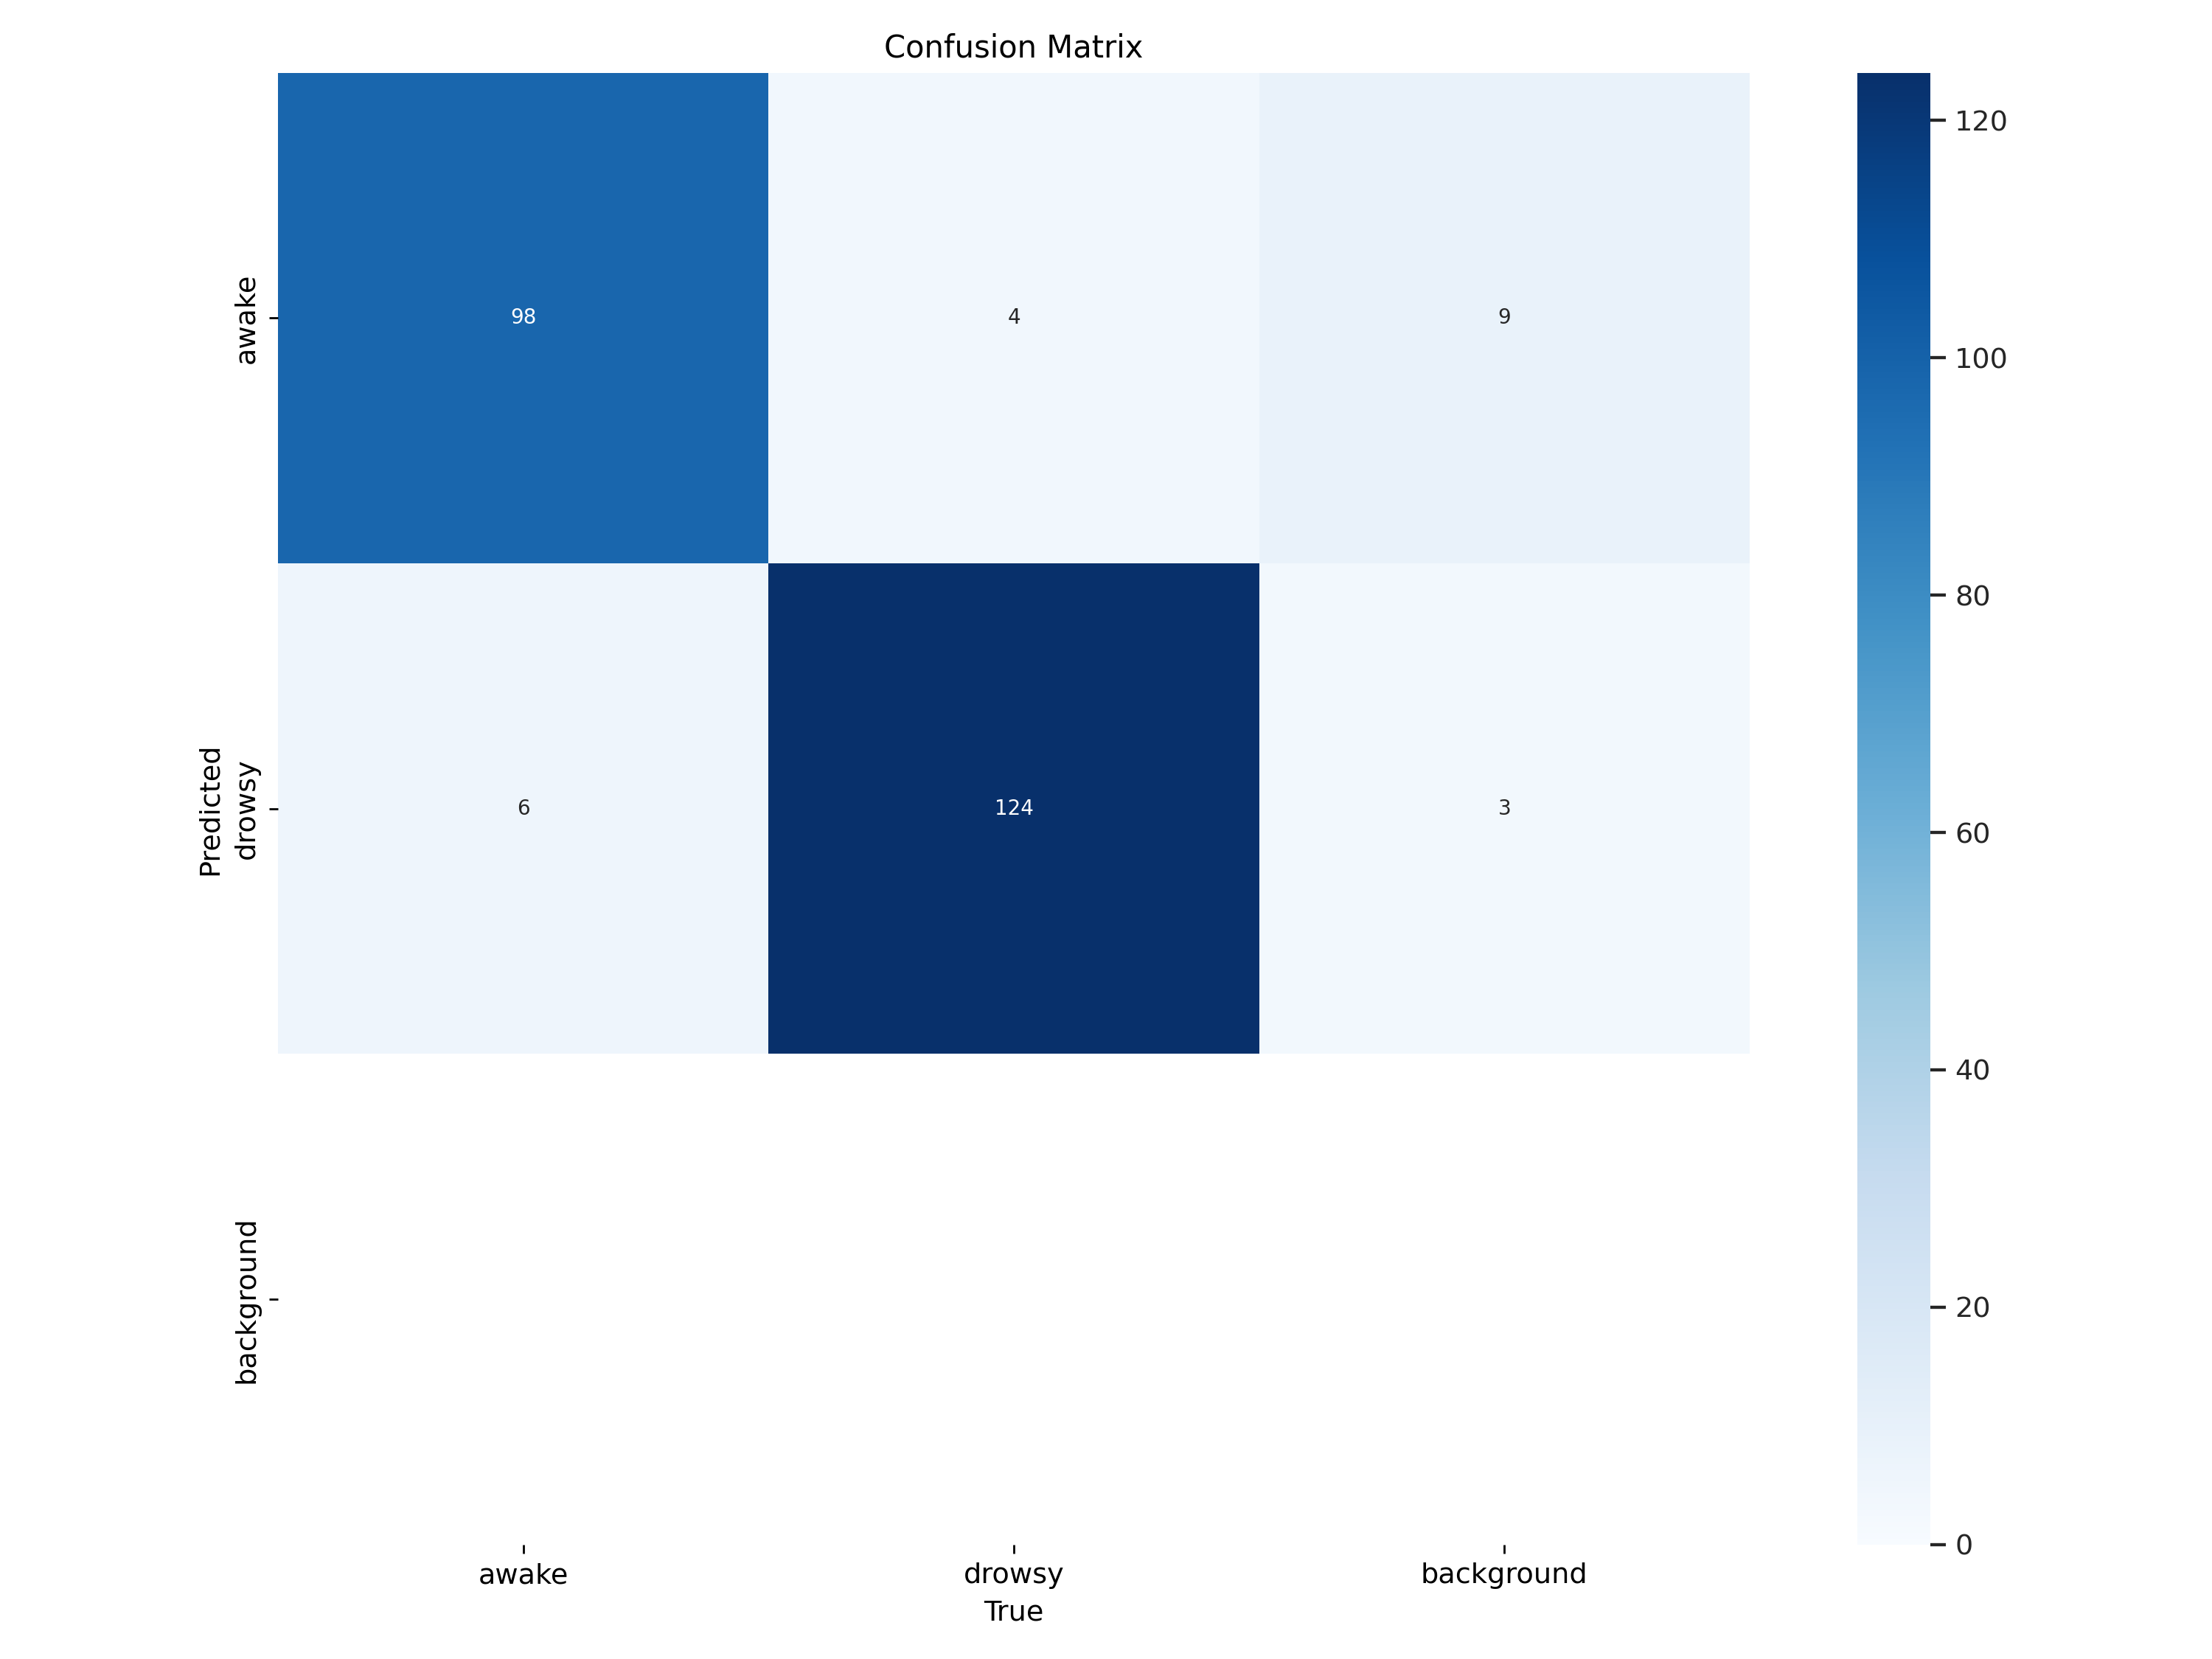

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/kaggle/working


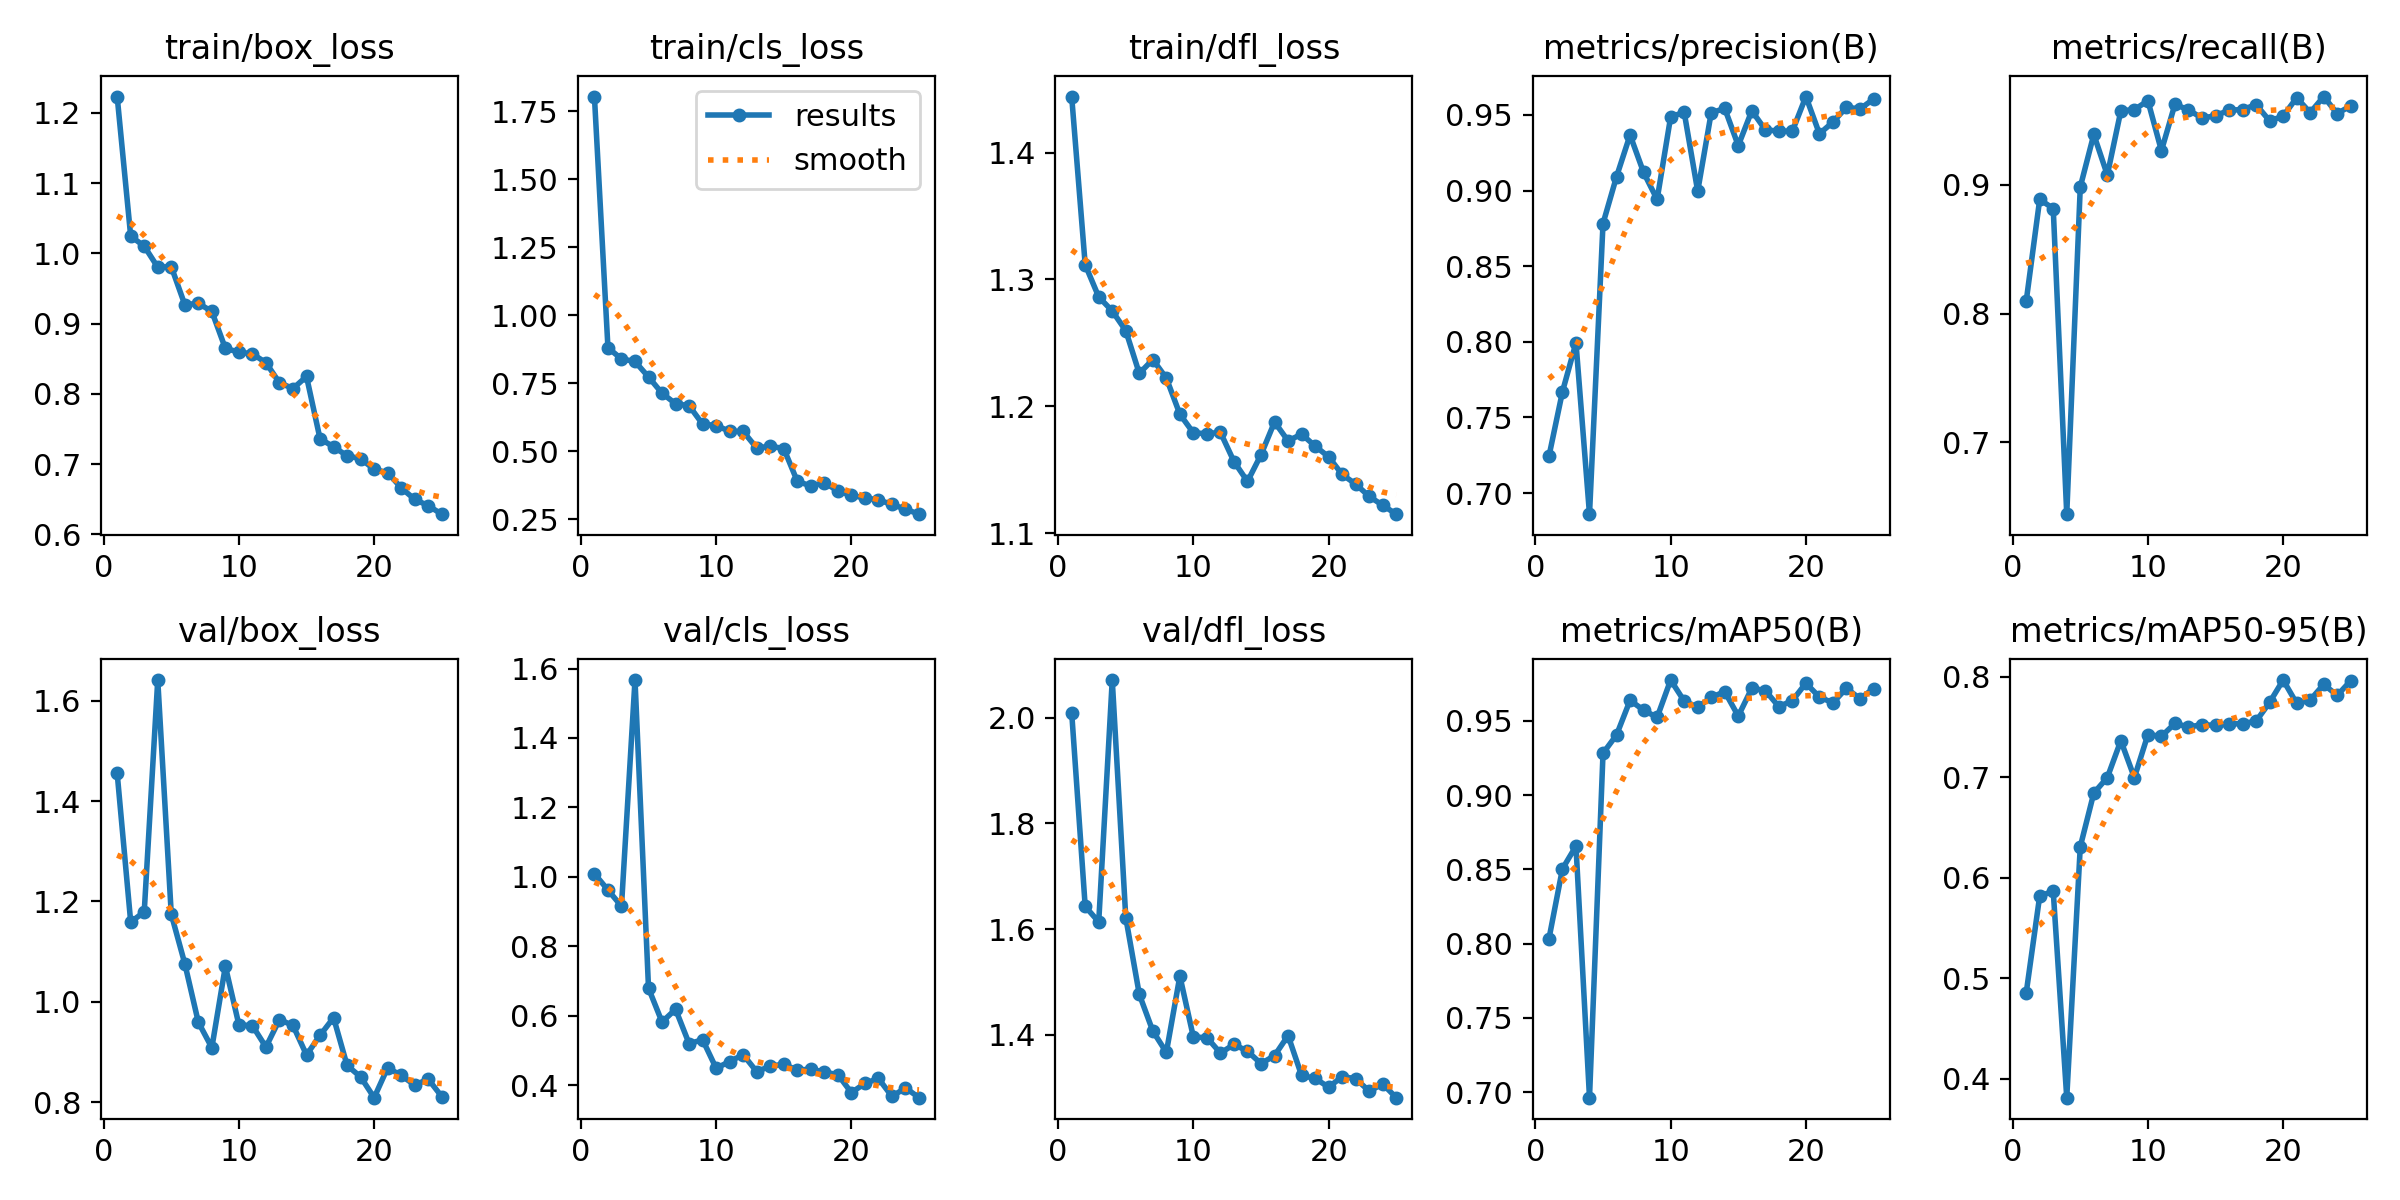

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/kaggle/working


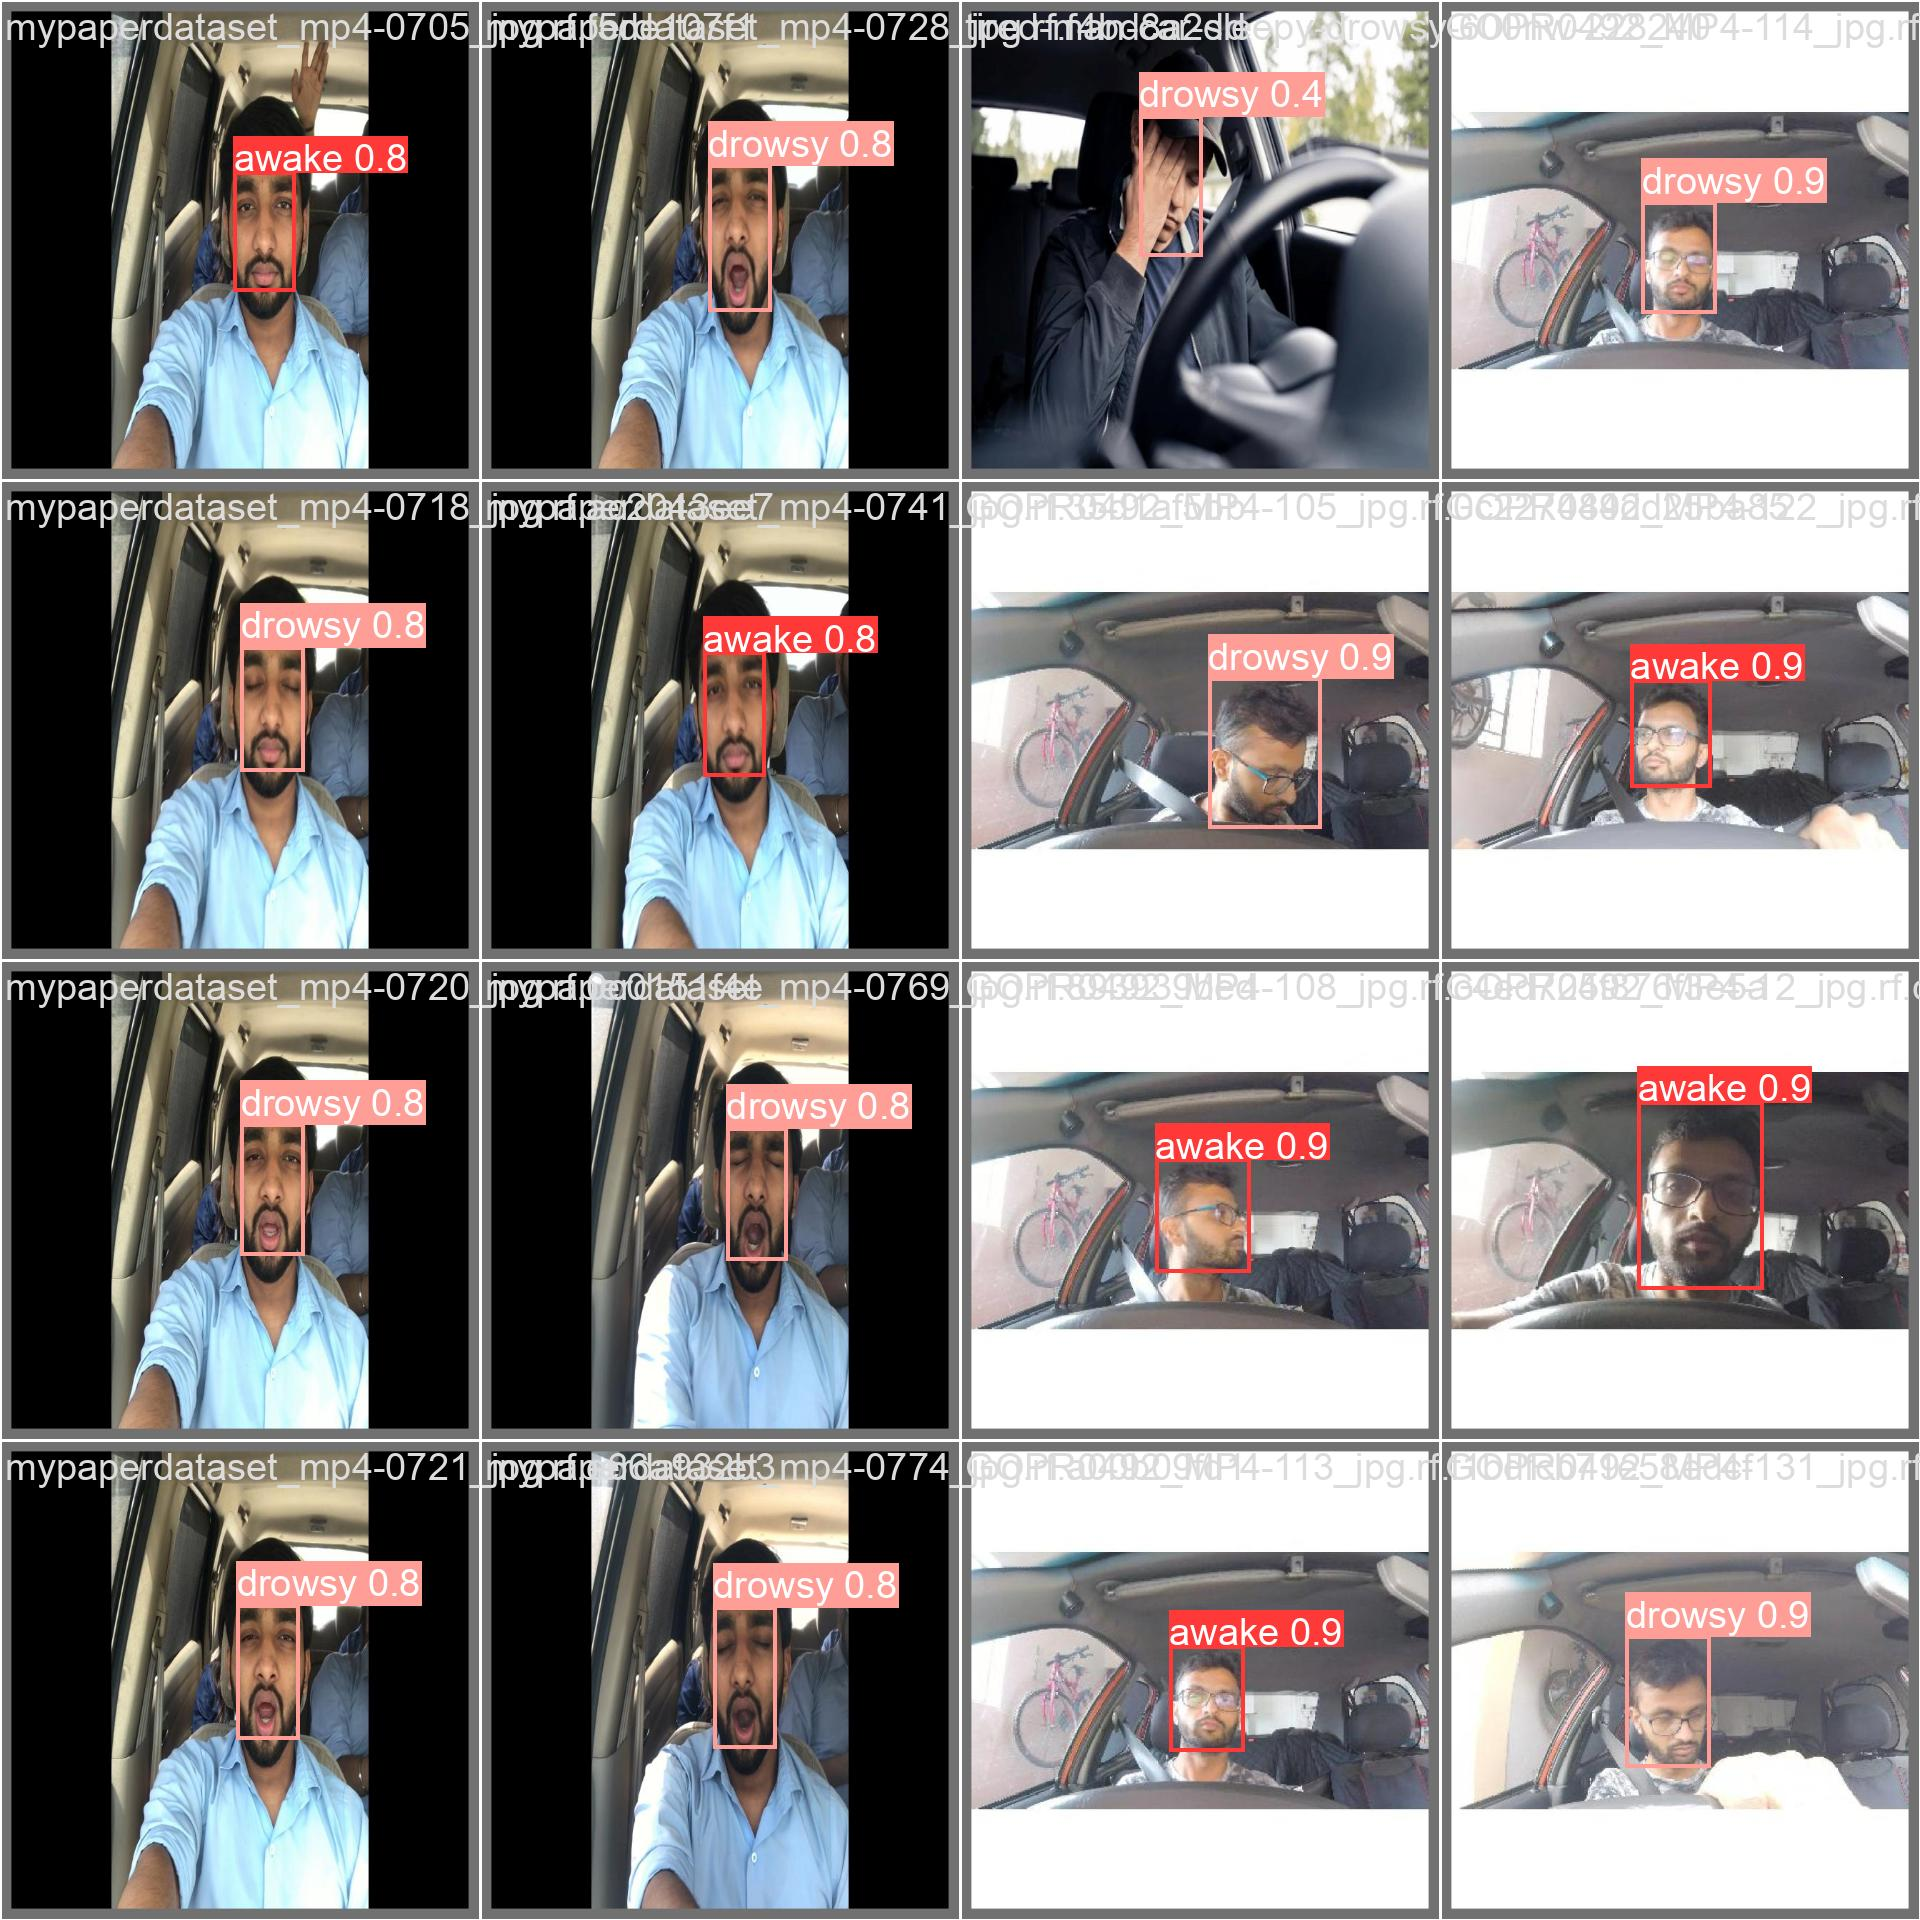

In [14]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=800)

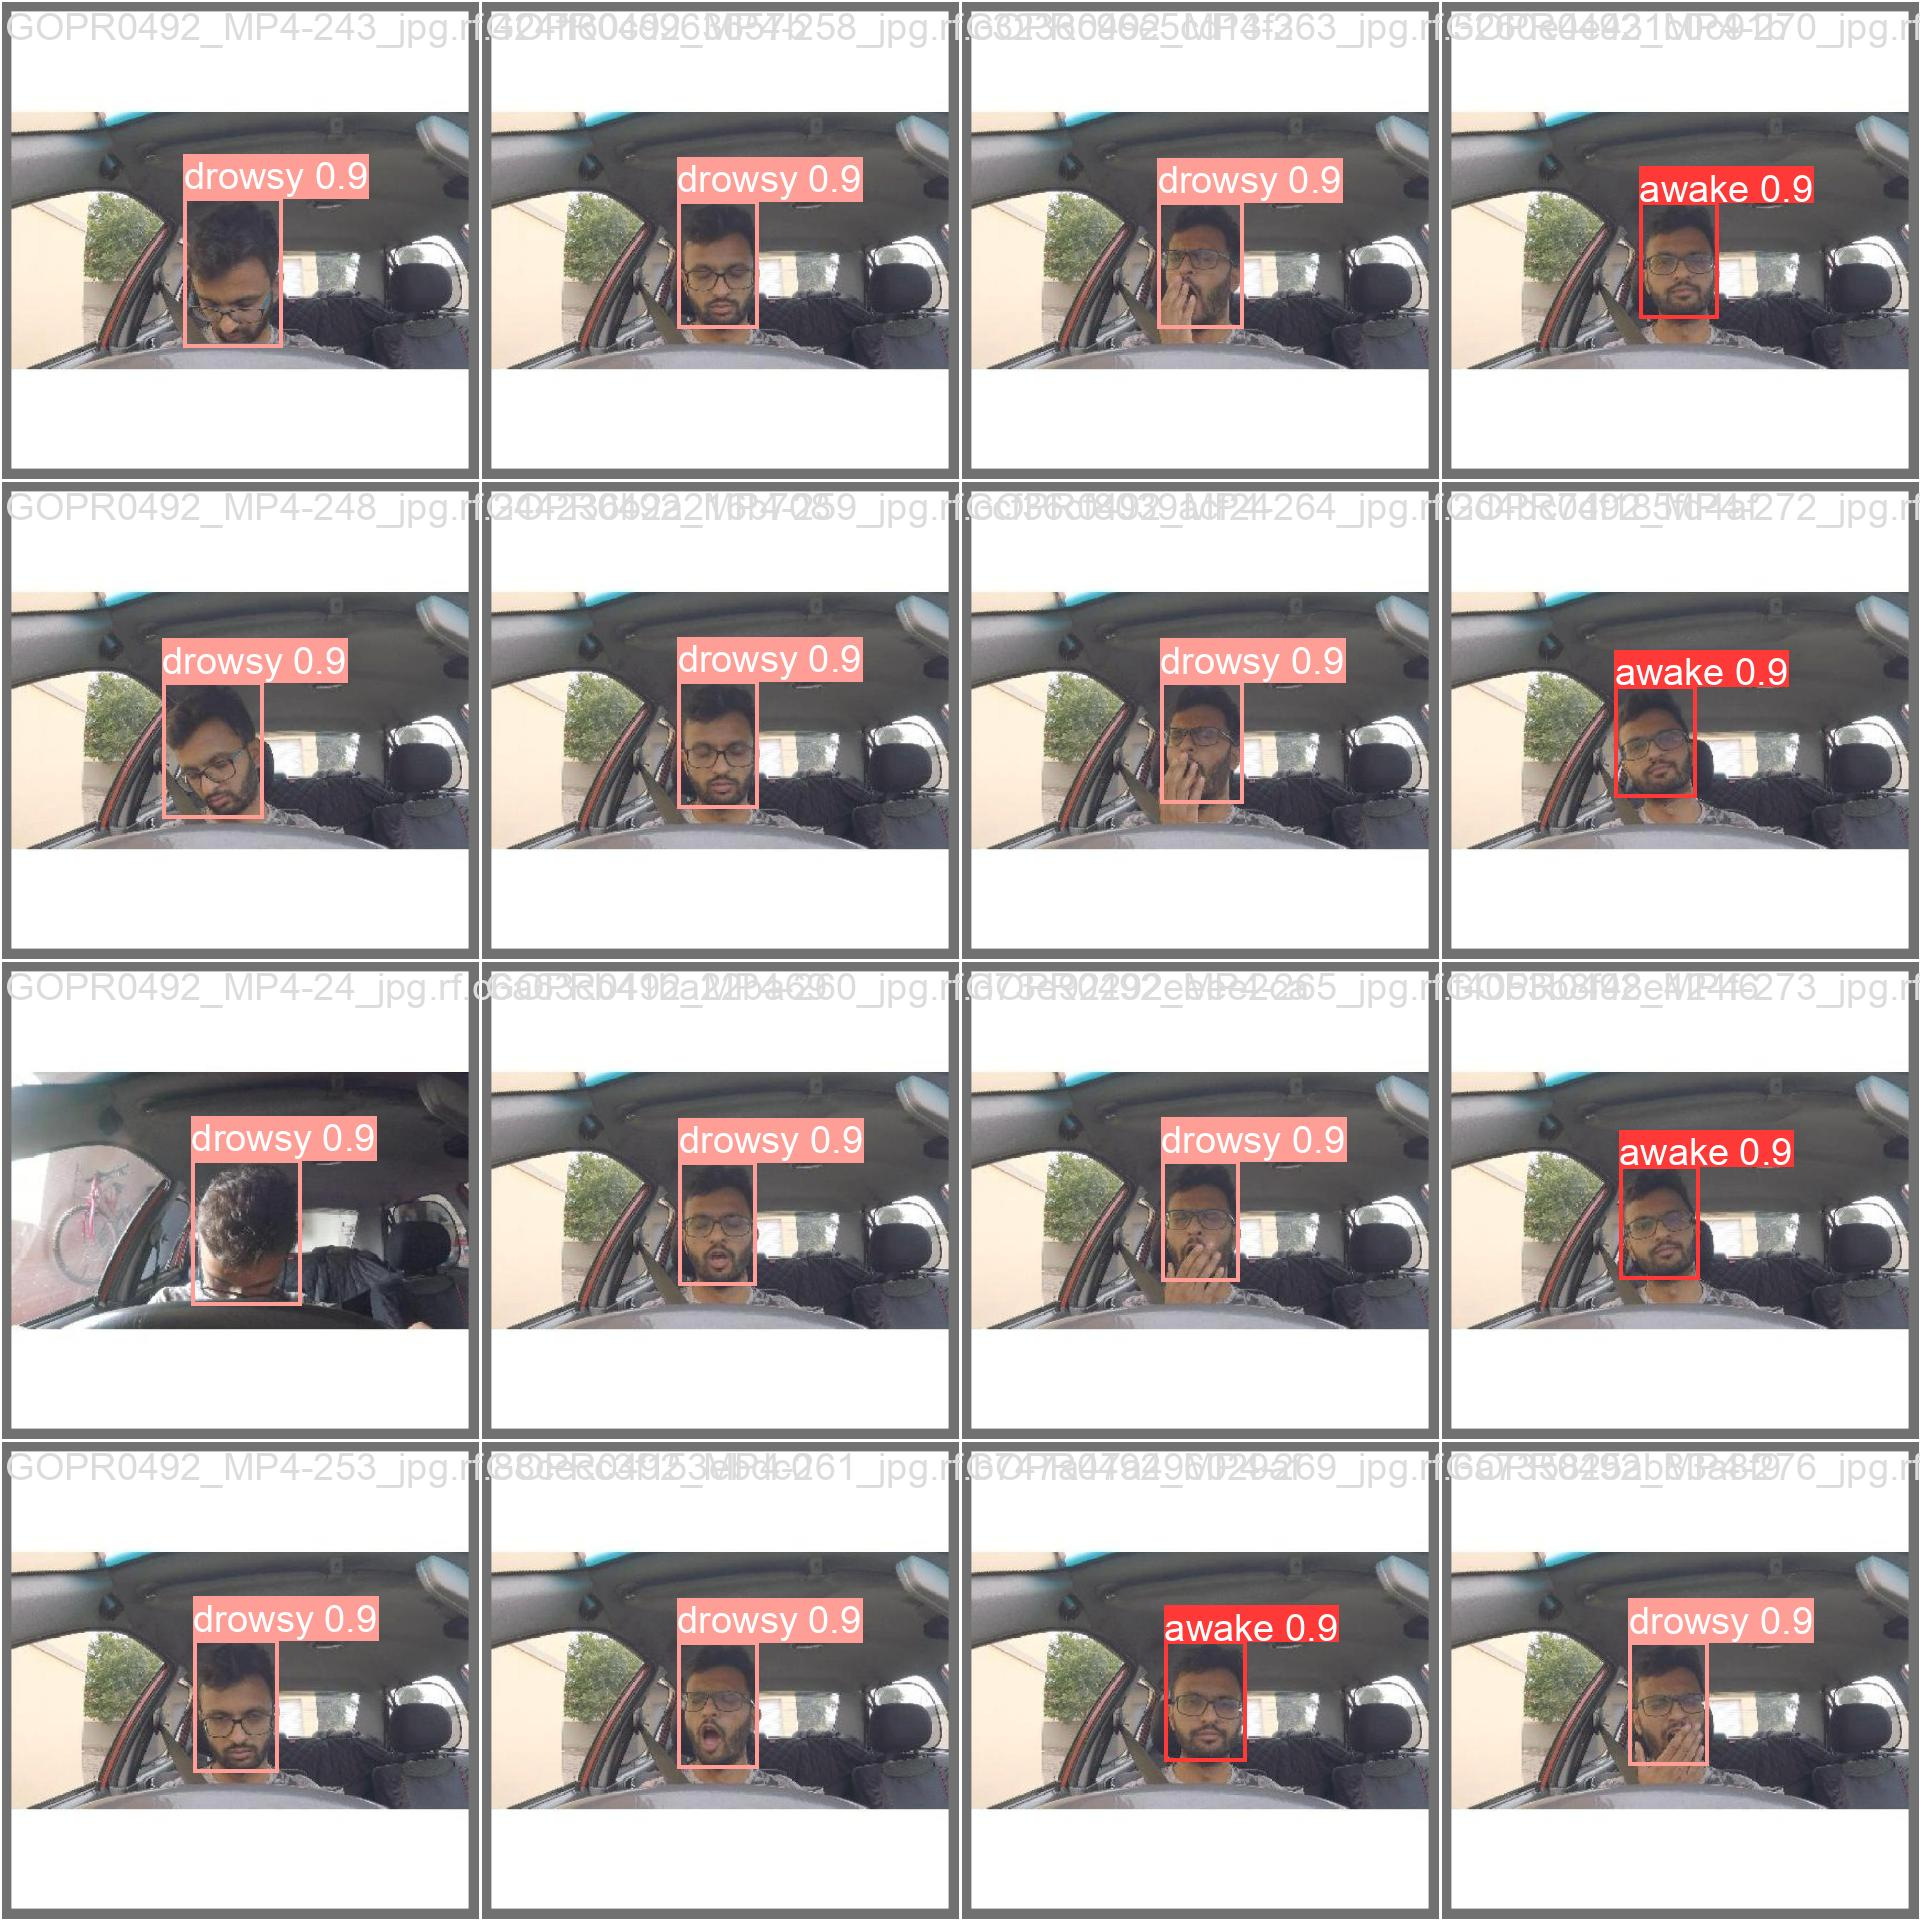

In [15]:
Image(filename=f'{HOME}/runs/detect/train/val_batch1_pred.jpg', width=800)

In [16]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/kaggle/working
/opt/conda/lib/python3.10/site-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'

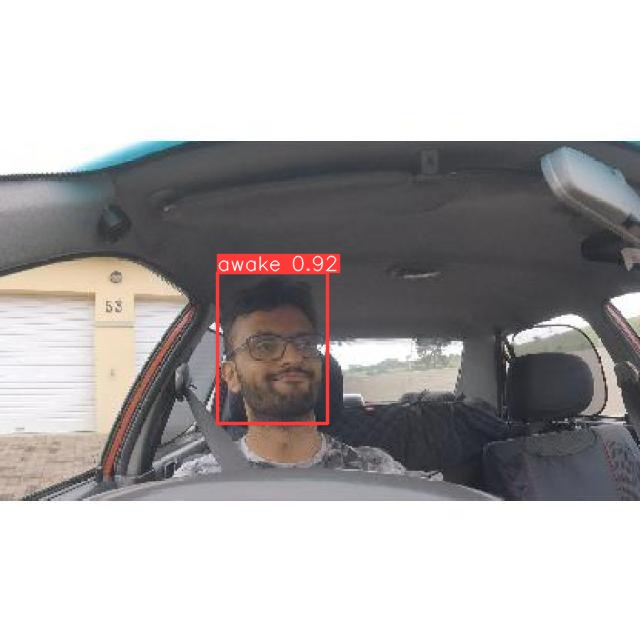

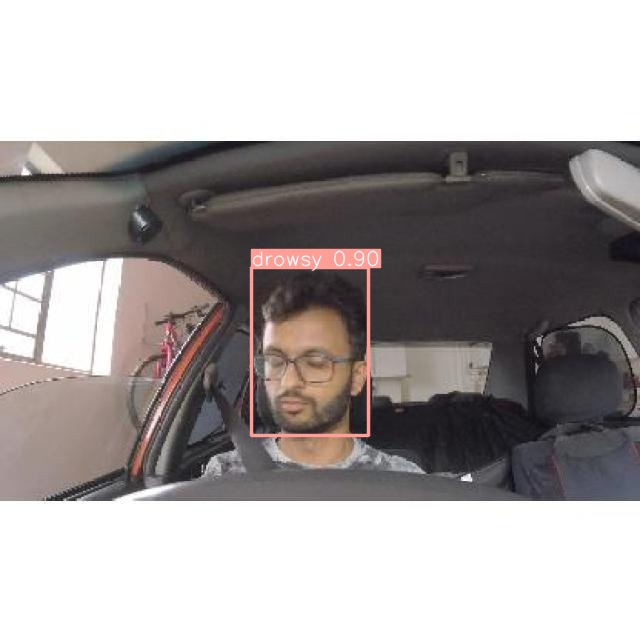

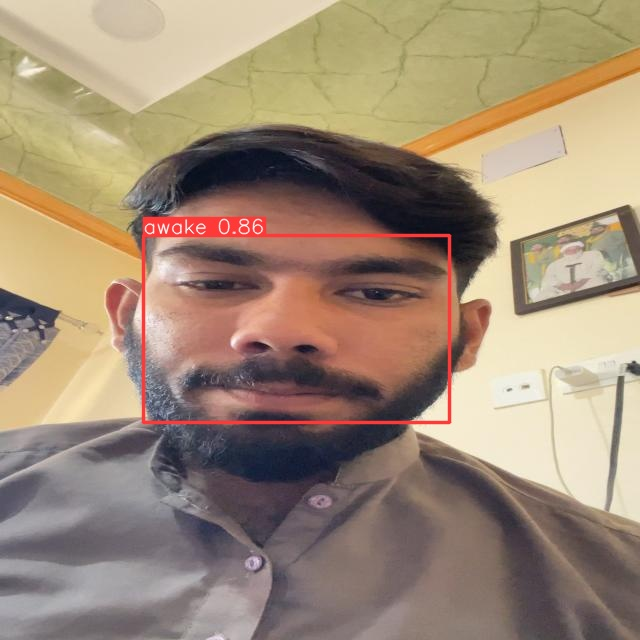

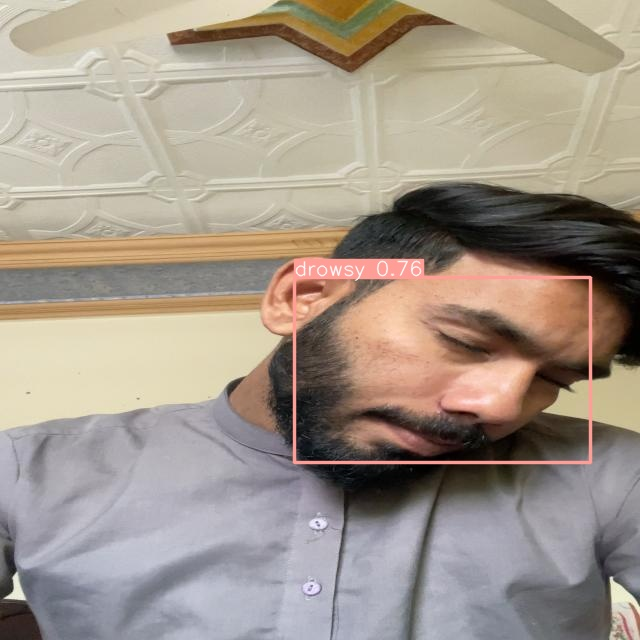

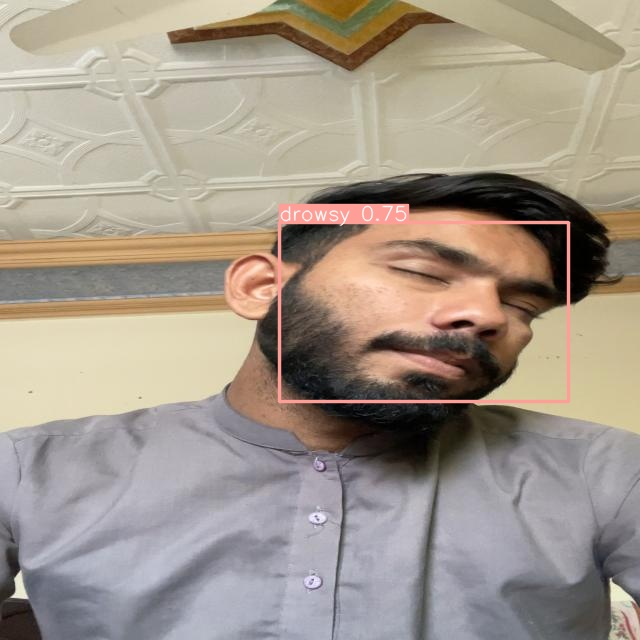

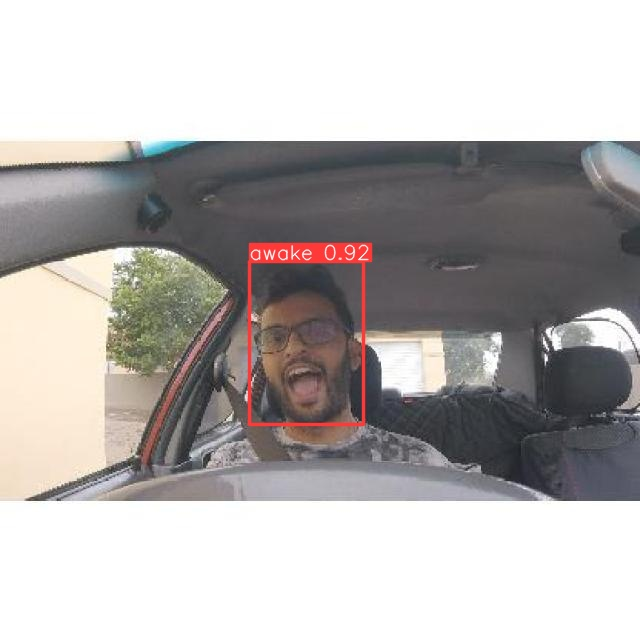

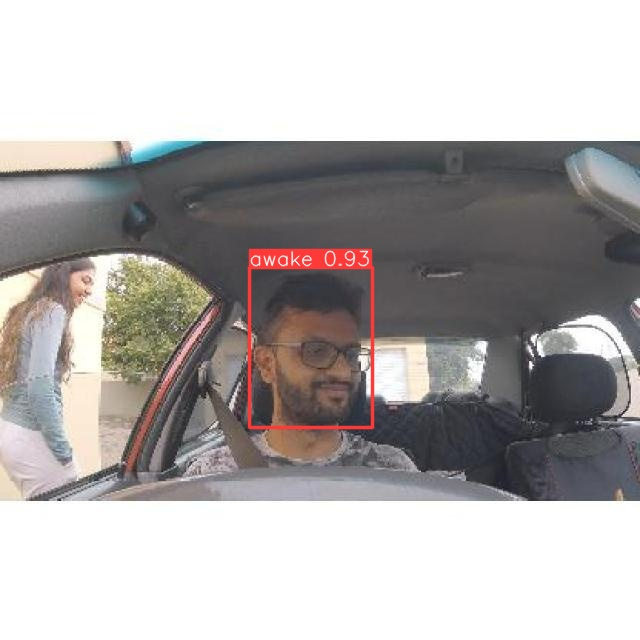

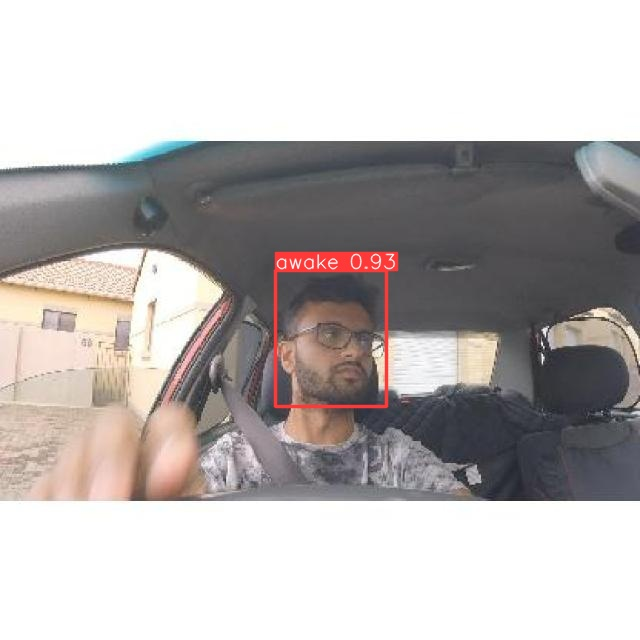

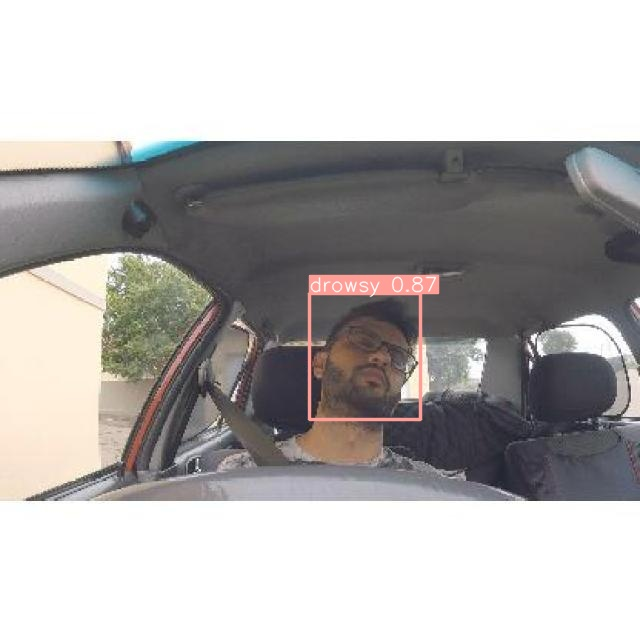

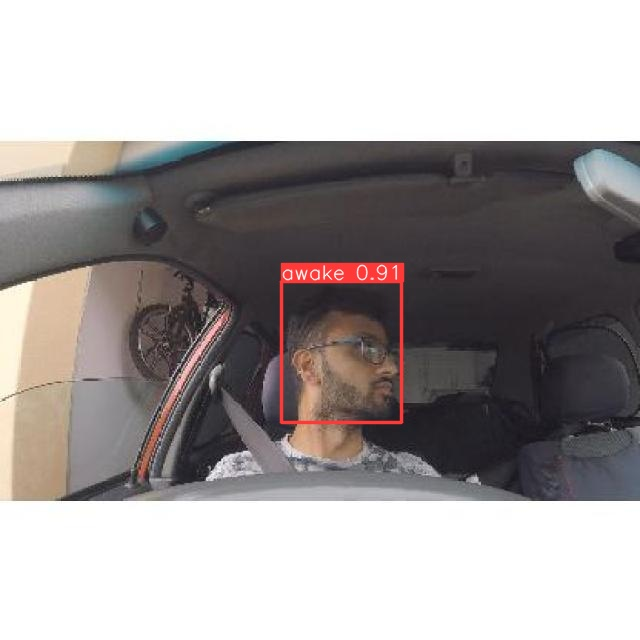

In [17]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/kaggle/working/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path) 
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict2')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:10]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")